In [7]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key 

In [8]:
electric_generation_urls = []

electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.CLTO_US.A") #Coal_generation_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HVTO_US.A") #Hydropower_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.NGTO_US.A") #Natural_gas_url 
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.NUTO_US.A") #nuclear_fuel_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.OGTO_US.A") #other_gases_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.OTTO_US.A") #othet_nonrenewable_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HPTO_US.A") #pumped_hydropower_url
electric_generation_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.TSEO_US.A") #us_annual_total_url


In [9]:
generation_Capacity = []
generation_years = []
i = 0

for electric_url in electric_generation_urls:
    generation_response = requests.get(electric_url).json()
    generation_Capacity.append([])
    generation_years.append([])
    for response in generation_response["series"][0]["data"]:
        generation_Capacity[i].append(response[1])
        generation_years[i].append(response[0])
    generation_Capacity[i] = generation_Capacity[i][::-1]
    generation_years[i] = generation_years[i][::-1]
    i += 1
    

In [10]:
electric_generation_df = pd.DataFrame({
    'years' : generation_years[0],
    'Coal' : generation_Capacity[0],    
    'Hydro Power' : generation_Capacity[1],
    'Natural Gas' : generation_Capacity[2],
    'Nuclear Fuel' : generation_Capacity[3],
    'Other Gases' : generation_Capacity[4],
    'Other Non Renewables' : generation_Capacity[5],
    'Pumped Hydro Power' : generation_Capacity[6],
    'Total Generation' : generation_Capacity[7]
    
})

electric_generation_df.head()

,years,Coal,Hydro Power,Natural Gas,Nuclear Fuel,Other Gases,Other Non Renewables,Pumped Hydro Power,Total Generation
0,1990,4367.154737,802.372182,1021.274395,1580.442953,28.446110,9.905888,-9.610249,8322.814622
1,1991,4357.870542,791.764901,1045.350731,1678.260512,31.056419,12.983143,-12.442288,8421.366808
2,1992,4429.524696,691.497277,1104.028339,1690.645527,36.257478,10.163625,-11.411426,8425.907661
3,1993,4630.329403,768.476733,1136.785748,1672.030723,35.495337,9.553852,-11.056362,8759.427660
4,1994,4632.037983,712.673240,1260.873101,1754.629677,36.490550,10.046370,-9.254315,8897.321611


In [13]:
electric_generation_df = electric_generation_df.set_index('years')

ax = electric_generation_df.plot( linewidth=5, figsize=(20,10), title = 'US Electrical Generation Energy Supply')

ax.set_ylabel("Mega Watts")
ax.set_xlabel("years")
ax.grid(True)
plt.savefig("output/Total_electric_generation.png")

KeyError: 'years'

In [14]:
# US Renewable Energy Supply

renewable_urls = []
renewable_Net_Capacity = []
renewable_years = []
i = 0

renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.WNEPCAPX_US.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.SOEPCAPX_US.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.GEEPCAP_US.A")
renewable_urls.append("http://api.eia.gov/series/?api_key=" + api_key + "&series_id=STEO.HVEPCAP_US.A")

for renew_url in renewable_urls:
    renewable_response = requests.get(renew_url).json()
    #renewable_Net_Capacity.append(i)
    renewable_Net_Capacity.append([])
    renewable_years.append([])
    for response in renewable_response["series"][0]["data"]:
        renewable_Net_Capacity[i].append(response[1])
        renewable_years[i].append(response[0])
    renewable_Net_Capacity[i] = renewable_Net_Capacity[i][::-1]
    renewable_years[i] = renewable_years[i][::-1]
    #print(len(renewable_Net_Capacity[i]))
    i += 1


    

In [15]:
#renewable_Net_Capacity

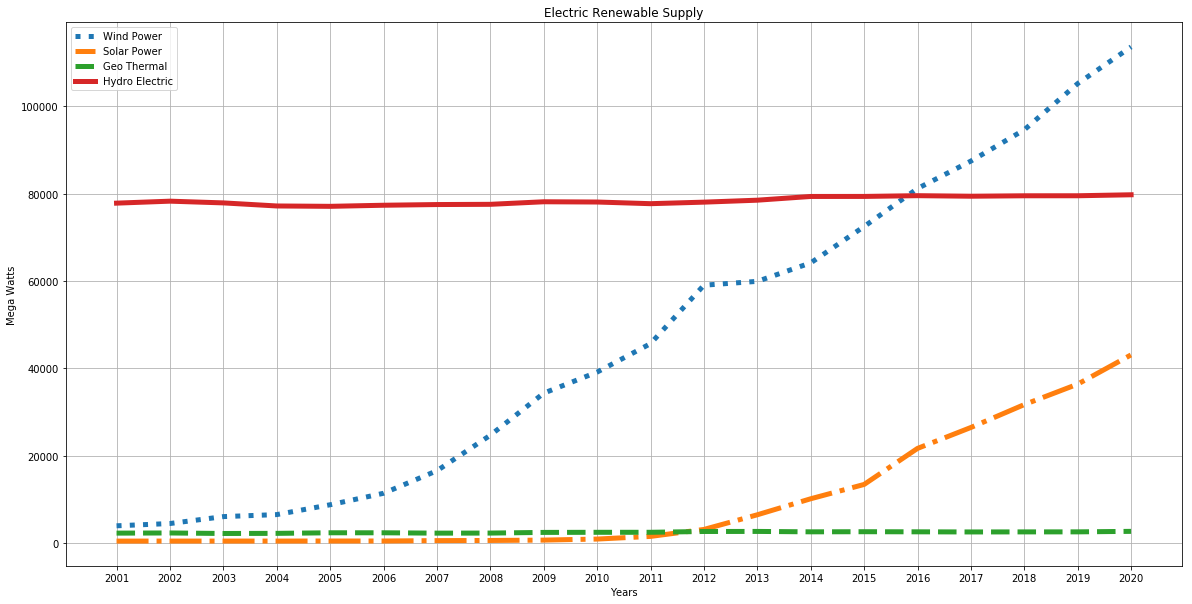

In [16]:
plt.figure(figsize=(20,10))
plt.plot(renewable_years[0], renewable_Net_Capacity[0], label="Wind Power", linewidth=5, linestyle = ':')
plt.plot(renewable_years[0], renewable_Net_Capacity[1], label="Solar Power", linewidth=5, linestyle = '-.')
plt.plot(renewable_years[0], renewable_Net_Capacity[2], label="Geo Thermal", linewidth=5,  linestyle = '--')
plt.plot(renewable_years[0], renewable_Net_Capacity[3], label="Hydro Electric", linewidth=5)
plt.xlabel("Years")
plt.ylabel("Mega Watts")
plt.title("Electric Renewable Supply")

plt.legend()
plt.grid(True)

plt.savefig("output/Electric_Renewable_Supply.png")

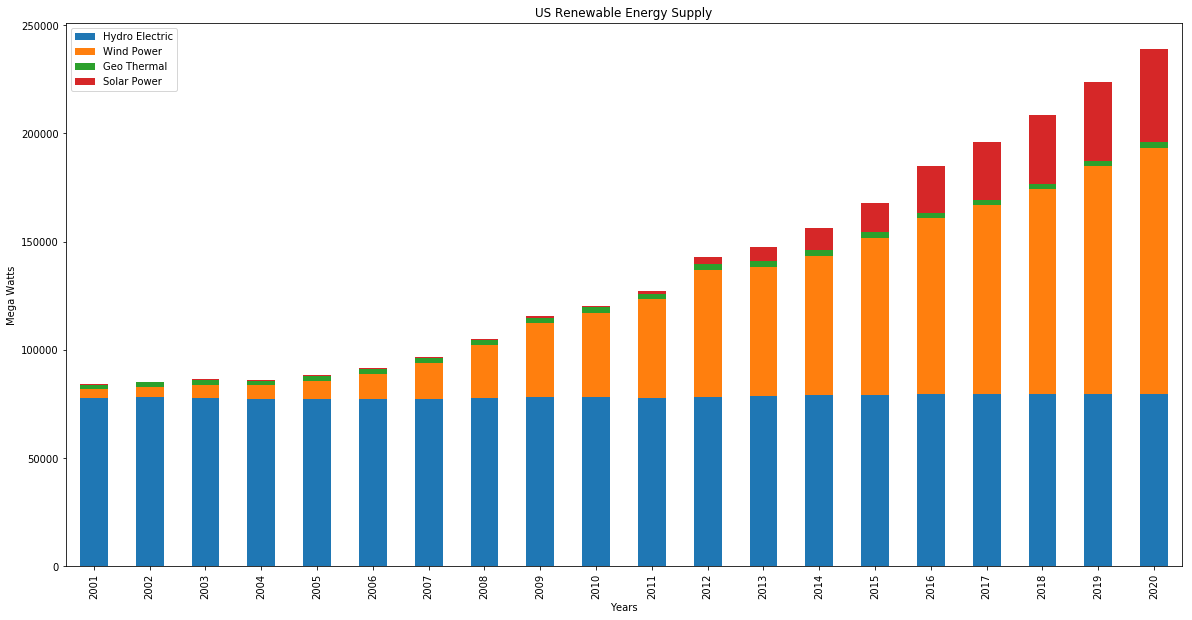

In [17]:

renewable_supply_df = pd.DataFrame({
    'years' : renewable_years[0],
    'Hydro Electric' : renewable_Net_Capacity[3],    
    'Wind Power' : renewable_Net_Capacity[0],
    'Geo Thermal' : renewable_Net_Capacity[2],
    'Solar Power' : renewable_Net_Capacity[1]
    
})

renewable_supply_df.head()

renewable_supply_df = renewable_supply_df.set_index('years')

ax = renewable_supply_df.plot(kind='bar', stacked=True, figsize=(20,10), title = 'US Renewable Energy Supply')

ax.set_ylabel("Mega Watts")
ax.set_xlabel("Years")
plt.savefig("output/Renewable_Supply_Bar.png")

In [18]:
renewable_supply_df.to_csv("resources/renewable_supply.csv")
electric_generation_df.to_csv("resources/electrical_generation.csv")

In [43]:
def percent_change_cal(capacity, percent_change):
    i = 0
    for supply in capacity:
        if(i == 0):
            percent_change.append(0)
        else:
            percent_change.append((supply - capacity[i - 1]) / capacity[i - 1] * 100)
        i += 1

solar_percent_change = []
hydro_percent_change = []
wind_percent_change = []
geo_percent_change = []
percent_change_cal(renewable_Net_Capacity[1], solar_percent_change)
percent_change_cal(renewable_Net_Capacity[3], hydro_percent_change)
percent_change_cal(renewable_Net_Capacity[0], wind_percent_change)
percent_change_cal(renewable_Net_Capacity[2], geo_percent_change)


renewable_percent_change_df = pd.DataFrame({
    'years' : renewable_years[0],
    'Solar % Change' : solar_percent_change,
    'Hydro % Change' : hydro_percent_change,
    'Wind % Change' : wind_percent_change,
    'Geo % Change' : geo_percent_change
})

renewable_percent_change_df

,years,Solar % Change,Hydro % Change,Wind % Change,Geo % Change
0,2001,0.000000,0.000000,0.000000,0.000000
1,2002,1.353422,0.581633,13.432161,1.679740
2,2003,0.100781,-0.505943,35.890405,-5.278918
3,2004,0.201359,-0.904145,7.696204,1.340827
4,2005,3.265511,-0.108852,34.894410,6.156534
5,2006,0.000000,0.325549,30.181543,-0.100997
6,2007,21.746534,0.206078,45.497875,-3.511448
7,2008,6.793207,0.066045,49.265218,0.659380
8,2009,15.509822,0.753856,39.118829,6.869167
9,2010,38.937480,-0.074207,14.074519,0.953021


(-20, 160)

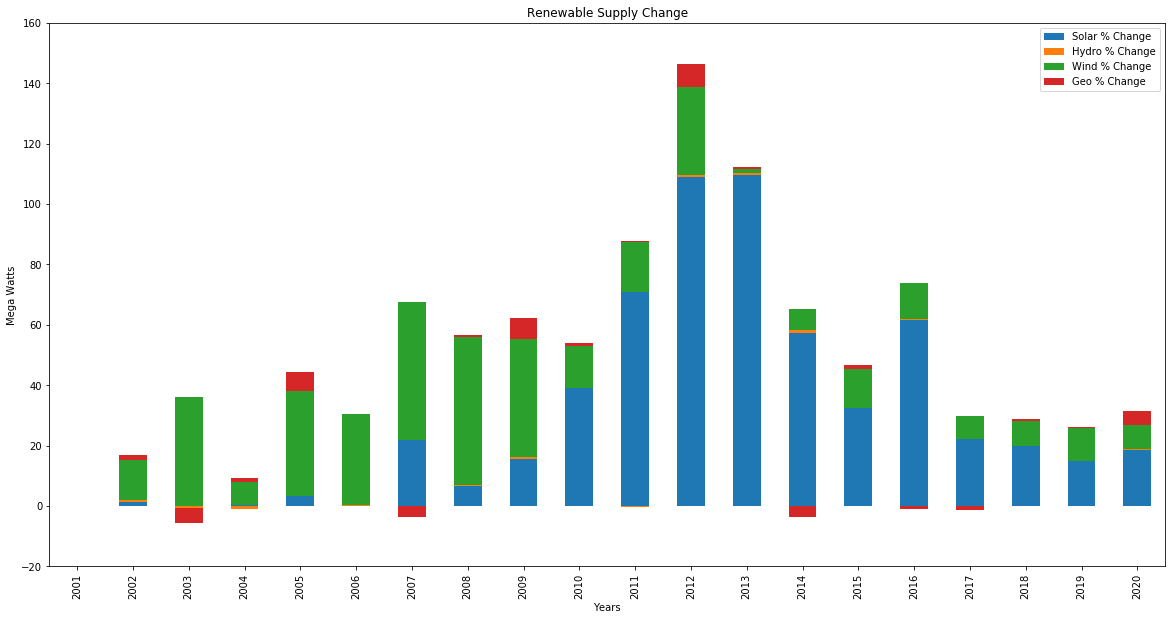

In [44]:
renewable_percent_change_df = renewable_percent_change_df.set_index('years')
renewable_change_ax = renewable_percent_change_df.plot(kind='bar', stacked=True, figsize=(20,10), title = 'Renewable Supply Change')

renewable_change_ax.set_ylabel("Mega Watts")
renewable_change_ax.set_xlabel("Years")
renewable_change_ax.set_ylim(-20, 160)
#plt.savefig("output/Renewable_Supply_Bar.png")

In [45]:
electric_generation_df.head()

,Coal,Hydro Power,Natural Gas,Nuclear Fuel,Other Gases,Other Non Renewables,Pumped Hydro Power,Total Generation
years,,,,,,,,
1990,4367.154737,802.372182,1021.274395,1580.442953,28.446110,9.905888,-9.610249,8322.814622
1991,4357.870542,791.764901,1045.350731,1678.260512,31.056419,12.983143,-12.442288,8421.366808
1992,4429.524696,691.497277,1104.028339,1690.645527,36.257478,10.163625,-11.411426,8425.907661
1993,4630.329403,768.476733,1136.785748,1672.030723,35.495337,9.553852,-11.056362,8759.427660
1994,4632.037983,712.673240,1260.873101,1754.629677,36.490550,10.046370,-9.254315,8897.321611


In [60]:
coal_supply_percent_change = []
hydro_supply_percent_change = []
natural_gas_percent_change = []
Nuclear_fuel_percent_change = []
Other_gases_percent_change = []
Other_Non_Renewables_percent_change = []
Pumped_hydro_percent_change = []

percent_change_cal(electric_generation_df['Coal'], coal_supply_percent_change)
percent_change_cal(electric_generation_df['Hydro Power'], hydro_supply_percent_change)
percent_change_cal(electric_generation_df['Natural Gas'], natural_gas_percent_change)
percent_change_cal(electric_generation_df['Nuclear Fuel'], Nuclear_fuel_percent_change)
percent_change_cal(electric_generation_df['Other Gases'], Other_gases_percent_change)
percent_change_cal(electric_generation_df['Other Non Renewables'], Other_Non_Renewables_percent_change)
percent_change_cal(electric_generation_df['Pumped Hydro Power'], Pumped_hydro_percent_change)
#percent_change_cal(renewable_Net_Capacity[3], hydro_percent_change)
#percent_change_cal(renewable_Net_Capacity[0], wind_percent_change)
#percent_change_cal(renewable_Net_Capacity[2], geo_percent_change)
print(electric_generation_df.index.values)
#hydro_supply_percent_change


['1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999'
 '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020']


In [66]:
electric_supply_percent_change_df = pd.DataFrame({
    'years' : electric_generation_df.index.values,
    'Coal % Change' : coal_supply_percent_change,
    'Hydro % Change' : hydro_supply_percent_change,
    'Natural Gas % Change' : natural_gas_percent_change,
    'Nuclear Fuel % Change' : Nuclear_fuel_percent_change,
    'Other Gases % Change' : Other_gases_percent_change,
    'Other Non Renewable % Change' : Other_Non_Renewables_percent_change,
    'Pumped Hydro % Change' : Pumped_hydro_percent_change
})

electric_supply_percent_change_df

,years,Coal % Change,Hydro % Change,Natural Gas % Change,Nuclear Fuel % Change,Other Gases % Change,Other Non Renewable % Change,Pumped Hydro % Change
0,1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1991,-0.212591,-1.321990,2.357480,6.189250,9.176330,31.064908,29.468937
2,1992,1.644247,-12.663813,5.613198,0.737967,16.747130,-21.716760,-8.285144
3,1993,4.533324,11.132286,2.967080,-1.101047,-2.102024,-5.999563,-3.111484
4,1994,0.036900,-7.261572,10.915632,4.940038,2.803785,5.155178,-16.298730
5,1995,1.107983,19.493272,7.787442,5.146821,4.136183,11.914154,-19.322908
6,1996,4.730488,11.382579,-8.516281,-0.076789,3.220187,-13.214231,13.008902
7,1997,3.056769,2.957452,5.638106,-6.574801,-6.747110,1.417049,31.181056
8,1998,1.544700,-9.290707,10.817392,7.167478,1.060498,-1.123479,10.578837
9,1999,0.404135,-1.175135,4.731988,8.097350,4.694376,12.666229,36.478997


(-20, 160)

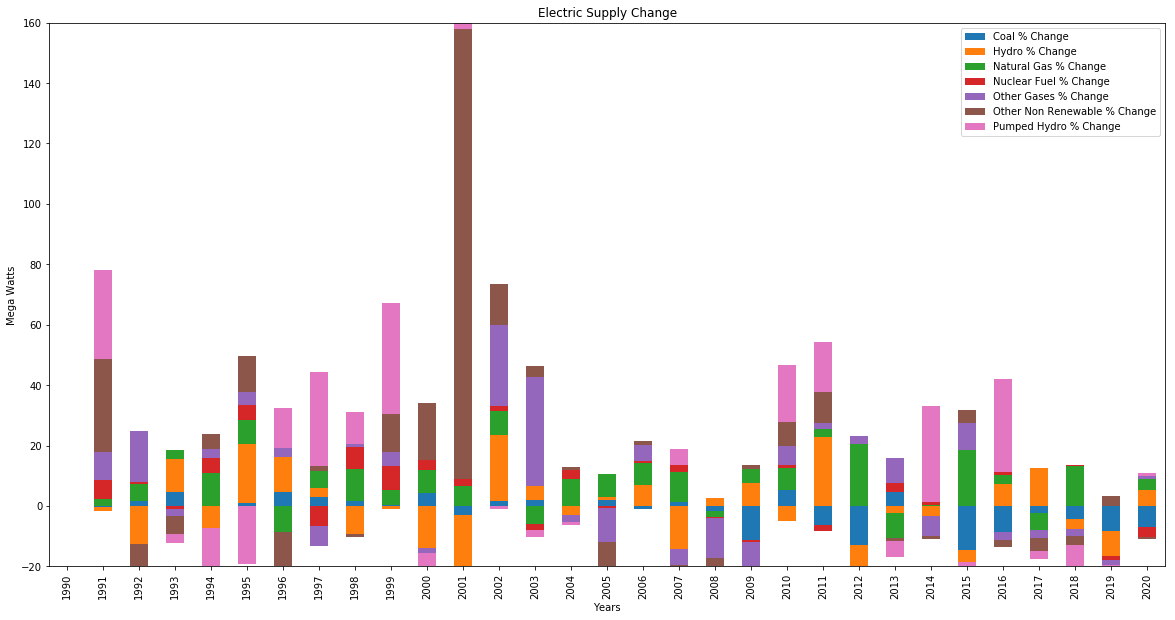

In [67]:
electric_supply_percent_change_df = electric_supply_percent_change_df.set_index('years')
electric_supply_change_ax = electric_supply_percent_change_df.plot(kind='bar', stacked=True, figsize=(20,10), title = 'Electric Supply Change')

electric_supply_change_ax.set_ylabel("Mega Watts")
electric_supply_change_ax.set_xlabel("Years")
electric_supply_change_ax.set_ylim(-20, 160)

In [74]:
coal_min_supply_value = electric_supply_percent_change_df["Coal % Change"].min()
coal_min_supply_year = int(electric_supply_percent_change_df[electric_supply_percent_change_df["Coal % Change"]==coal_min_supply_value].index.values)
coal_max_supply_value = electric_supply_percent_change_df["Coal % Change"].max()
coal_max_supply_year = int(electric_supply_percent_change_df[electric_supply_percent_change_df["Coal % Change"]==coal_max_supply_value].index.values)

# find the difference between most and least emissions
coal_supply_change = (coal_max_supply_value - coal_min_supply_value)

#find the percentage change from lowest year to highest year
total_coal_percent_change = (coal_supply_change / coal_min_supply_value) *100

print(f"{coal_min_supply_year} had the least amount of coal generation with {coal_min_supply_value} million meric tons.")
print(f"{int(coal_max_supply_year)} has the most amount of total coal generation with {coal_max_supply_value} million meric tons.")
print(f"The difference in total coal generation from 1991 and 2007 is {coal_supply_change} million metric tons.")
print(f"The percentage change in coal generation from the lowest year to highest year is {total_coal_percent_change}%")

2015 had the least amount of coal generation with -14.497733651787886 million meric tons.
2010 has the most amount of total coal generation with 5.204499374995693 million meric tons.
The difference in total coal generation from 1991 and 2007 is 19.70223302678358 million metric tons.
The percentage change in coal generation from the lowest year to highest year is -135.89871010186388%
